#Text identification using OpenCV, Tesseract (OCR) and deep neural network  


In [1]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import cv2
import numpy as np
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
img = cv2.imread('/content/img2.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

array([[[123, 135, 160],
        [123, 135, 160],
        [123, 135, 160],
        ...,
        [128, 143, 165],
        [128, 143, 165],
        [128, 143, 165]],

       [[123, 135, 160],
        [123, 135, 160],
        [123, 135, 160],
        ...,
        [128, 143, 165],
        [128, 143, 165],
        [128, 143, 165]],

       [[123, 135, 160],
        [123, 135, 160],
        [123, 135, 160],
        ...,
        [128, 143, 165],
        [128, 143, 165],
        [128, 143, 165]],

       ...,

       [[141, 112,  95],
        [138, 109,  91],
        [135, 103,  86],
        ...,
        [ 74,  34,  29],
        [ 74,  34,  29],
        [ 74,  34,  29]],

       [[138, 109,  91],
        [134, 105,  88],
        [131, 100,  83],
        ...,
        [ 74,  34,  29],
        [ 74,  34,  29],
        [ 74,  34,  29]],

       [[135, 106,  89],
        [132, 103,  85],
        [129,  97,  81],
        ...,
        [ 74,  34,  29],
        [ 74,  34,  29],
        [ 74,  34,  29]]], dtype=uint8)
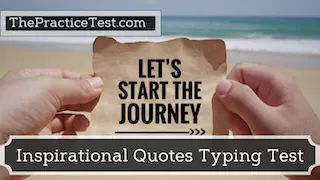

In [13]:
img

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

array([[134, 134, 134, ..., 141, 141, 141],
       [134, 134, 134, ..., 141, 141, 141],
       [134, 134, 134, ..., 141, 141, 141],
       ...,
       [119, 116, 111, ...,  45,  45,  45],
       [116, 112, 107, ...,  45,  45,  45],
       [113, 110, 105, ...,  45,  45,  45]], dtype=uint8)
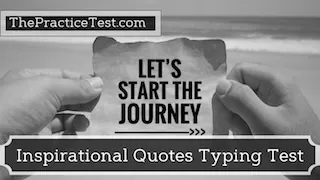

In [15]:
gray

array([[134, 134, 134, ..., 141, 141, 141],
       [134, 134, 134, ..., 141, 141, 141],
       [134, 134, 134, ..., 141, 141, 141],
       ...,
       [116, 114, 110, ...,  45,  45,  45],
       [114, 112, 108, ...,  45,  45,  45],
       [112, 111, 106, ...,  45,  45,  45]], dtype=uint8)
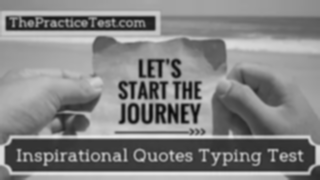

In [16]:
blur

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
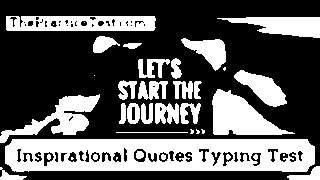

In [17]:
thresh

In [18]:
mser = cv2.MSER_create()
region, _ = mser.detectRegions(gray)

In [19]:
text = pytesseract.image_to_string(thresh)
print(text)

 

 

Aa
ay
Inspirational Quotes Typing Test
n, ~



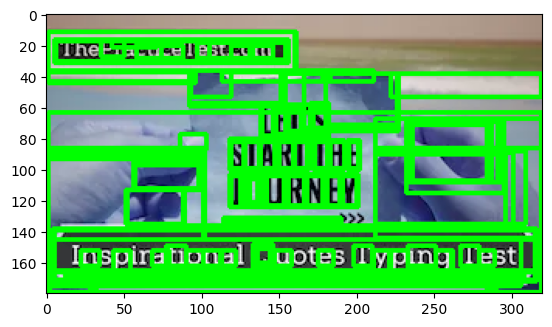

In [20]:
# Convert regions to bounding boxes
boxes = []
for r in region:
    x, y, w, h = cv2.boundingRect(r)
    boxes.append((x, y, w, h))

for (x,y,w,h) in boxes:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files
import os

In [22]:
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [23]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [24]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [25]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)

In [28]:


def scan_img(img_path):
  image_loaded = cv2.imread(img_path)

  # Check if image was successfully loaded
  if image_loaded is None:
      print(f"Error: Unable to read the image file: {img_path}")
  else:
      # Display original image
      print("\nOriginal Image:")
      cv2_imshow(image_loaded)

      # Preprocess image
      preprocessed_image = process_image(image_loaded)

      # Detect text regions
      text_boxes = text_regions(preprocessed_image)

      # Draw bounding boxes on the original image
      image_with_boxes = mark_text_regions(image_loaded, text_boxes)

      # Display the image with detected text regions
      print("\nImage with Text Detection Regions:")
      cv2_imshow(image_with_boxes)

      # Extract and print detected text
      extracted_text = extract_text(text_boxes)
      print("\nDetected Text:")
      print(extracted_text)


Original Image:


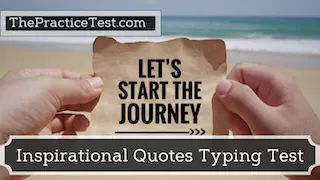


Image with Text Detection Regions:


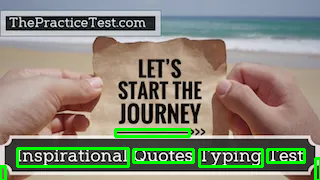


Detected Text:
Inspirational Quotes Typing Test.      


In [29]:
img_path = "/content/img2.webp"
scan_img(img_path)


Original Image:


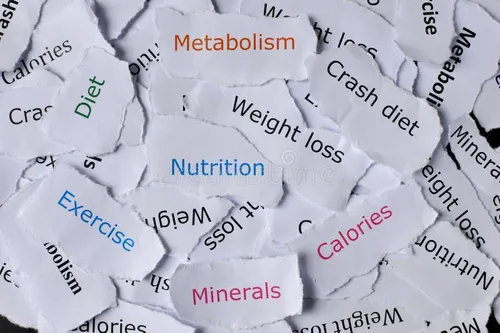


Image with Text Detection Regions:


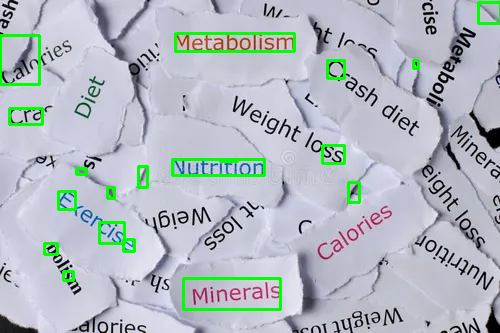


Detected Text:
Metabolism &   6 } cra iti Ss ~ / Nutrition & * A % 4 © %, Minerals


In [30]:
img_path = "/content/img1.webp"
scan_img(img_path)